# Colloid phase diagram collate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
##%matplotlib qt
from mpl_toolkits import mplot3d

import scipy.spatial.distance as ssd
from scipy import constants
from scipy import interpolate
from scipy.signal import savgol_filter
from scipy import stats
from scipy.linalg import eig, inv
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import KernelDensity

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as layout

import seaborn as sns

import time
import random

import subprocess

In [2]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

In [3]:
temps = np.array((1.8,1.9,1.95,1.96,1.97,1.98,1.99,2,2.01,2.02,2.03,2.04,2.05,2.1,2.2))

In [4]:
uni_dens=0.0004849999948630937
rho_uni=np.full(temps.shape[0],uni_dens)

rho_drp=np.loadtxt('rho_drop.dat')
rho_cry=np.loadtxt('rho_cryst.dat')
rho_vp1=np.loadtxt('rho_vp1.dat')
rho_vp2=np.loadtxt('rho_vp2.dat')
binodal=np.loadtxt('binodal.dat')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


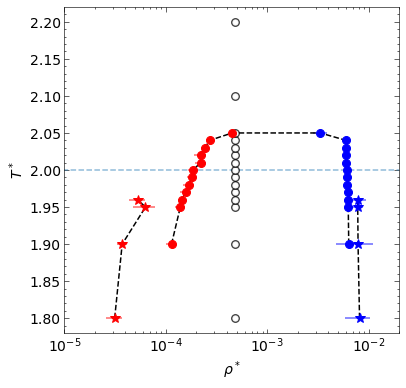

In [5]:
cmax = len(temps)-1
#fig, [[ax0]] = plt.subplots(nrows=1, ncols=1, sharex=False,figsize=(8,8), tight_layout=True, linewidth=100)  
plt.figure(figsize=(6,6)) 
plt.xscale("log")
#plt.yscale("log")

plt.plot(binodal.T[:][0],binodal.T[:][2],'k--')   
plt.plot(rho_vp2.T[:][0],rho_vp2.T[:][2],'k--')  
plt.plot(rho_cry.T[:][0],rho_cry.T[:][2],'k--')  
plt.plot([1e-6,1e-1],[2,2], '--',alpha=0.5)

# Plot the starting conditions
c = 0
for i in range(0,len(temps)):
    cols=[c/cmax,0.0,1-c/cmax]
    plt.plot(rho_uni[i],temps[i], 'o',color='black', markersize=8,alpha=0.6)
    plt.plot(rho_uni[i],temps[i], 'o',color='white', markersize=5)
    c += 1   
    
# Plot the 1st step droplet curve
c = 0
for i in range(0,len(rho_drp)):
    cols=[c/cmax,0.0,1-c/cmax]
    plt.plot(rho_drp[i][0],rho_drp[i][2], 'o',color='blue', markersize=8)
    plt.errorbar(rho_drp[i][0],rho_drp[i][2], xerr=rho_drp[i][1],color='blue', markersize=8,alpha=0.6)
    c += 1      
    
# Plot the 1st step vapour curve
c = 0
for i in range(0,len(rho_drp)):
    cols=[c/cmax,0.0,1-c/cmax]
    plt.plot(rho_vp1[i][0],rho_vp1[i][2], 'o',color='red', markersize=8)
    plt.errorbar(rho_vp1[i][0],rho_vp1[i][2], xerr=rho_vp1[i][1],color='red', markersize=8,alpha=0.6)
    c += 1      
    
# Plot the 2nd step crystal curve
c = 0
for i in range(0,len(rho_cry)):
    cols=[c/cmax,0.0,1-c/cmax]
    plt.plot(rho_cry[i][0],rho_cry[i][2], '*',color='blue', markersize=10)
    plt.errorbar(rho_cry[i][0],rho_cry[i][2], xerr=rho_cry[i][1],color='blue', markersize=8,alpha=0.6)
    c += 1     
    
# Plot the 2nd step vapour curve
c = 0
for i in range(0,len(rho_cry)):
    cols=[c/cmax,0.0,1-c/cmax]
    plt.plot(rho_vp2[i][0],rho_vp2[i][2], '*',color='red', markersize=10)
    plt.errorbar(rho_vp2[i][0],rho_vp2[i][2], xerr=rho_vp2[i][1],color='red', markersize=8,alpha=0.6)
    c += 1     
    

  
plt.xlabel(r'$\rho^*$')
plt.ylabel(r'$T^*$')
plt.xlim(1e-5,2e-2)
#plt.ylim(1.9,2.07)
#plt.show()

plt.savefig('./phase-diag.png', dpi=300, bbox_inches='tight')



## Plot the radial densities

In [6]:
rad_dens = np.loadtxt('./tmp-2.00/rad_drop.dat')

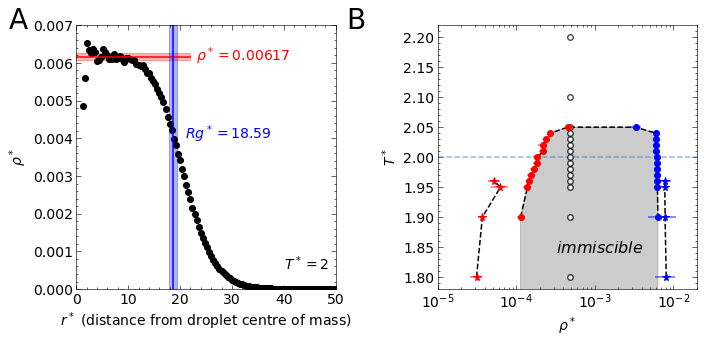

In [9]:
fig, [ax0, ax1] = plt.subplots(nrows=1, ncols=2, sharex=False,figsize=(10,5), tight_layout=True, linewidth=100)  

ax0.plot(rad_dens.T[0],rad_dens.T[1],'ko', markersize=6)
ax0.plot([0,22],[0.00616506,0.00616506],color='red')
ax0.fill_between([0,22],[0.00606527,0.00606527],[0.00626486,0.00626486],color='red',alpha=0.3)
ax0.plot([18.590309,18.590309],[0,0.007],color='blue')
ax0.fill_between([17.856708468959255,19.32391025058476],[0,0],[0.007,0.007],color='blue',alpha=0.3)
ax0.set_xlim(0,50)
ax0.set_ylim(0,0.007)
ax0.set_xlabel(r"$r^*$ (distance from droplet centre of mass)")
ax0.set_ylabel(r"$\rho^*$")
ax0.text(-13,0.0069,'A',fontsize=28)
ax0.text(23,0.00606506,r"$\rho^* = 0.00617$",color='red',fontsize=14)
ax0.text(21,0.004,r"$Rg^* = 18.59$",color='blue',fontsize=14)
ax0.text(40,0.0005,r"$T^* = 2$",color='black',fontsize=14)



ax1.set_xscale("log")
ax1.plot(binodal.T[:][0],binodal.T[:][2],'k--')  
ax1.fill_between(binodal.T[:][0],binodal.T[:][2], color='black',alpha=0.2)
ax1.plot(rho_vp2.T[:][0],rho_vp2.T[:][2],'k--')  
ax1.plot(rho_cry.T[:][0],rho_cry.T[:][2],'k--')  
ax1.plot([1e-6,1e-1],[2,2], '--',alpha=0.5)

# Plot the starting conditions
for i in range(0,len(temps)):
    cols=[c/cmax,0.0,1-c/cmax]
    ax1.plot(rho_uni[i],temps[i], 'o',color='black', markersize=6,alpha=0.6)
    ax1.plot(rho_uni[i],temps[i], 'o',color='white', markersize=3)  
    
# Plot the 1st step droplet curve
for i in range(0,len(rho_drp)):
    cols=[c/cmax,0.0,1-c/cmax]
    ax1.plot(rho_drp[i][0],rho_drp[i][2], 'o',color='blue', markersize=6)
    ax1.errorbar(rho_drp[i][0],rho_drp[i][2], xerr=rho_drp[i][1],color='blue', markersize=8,alpha=0.6)    
    
# Plot the 1st step vapour curve
for i in range(0,len(rho_drp)):
    cols=[c/cmax,0.0,1-c/cmax]
    ax1.plot(rho_vp1[i][0],rho_vp1[i][2], 'o',color='red', markersize=6)
    ax1.errorbar(rho_vp1[i][0],rho_vp1[i][2], xerr=rho_vp1[i][1],color='red', markersize=8,alpha=0.6)    
    
# Plot the 2nd step crystal curve
for i in range(0,len(rho_cry)):
    cols=[c/cmax,0.0,1-c/cmax]
    ax1.plot(rho_cry[i][0],rho_cry[i][2], '*',color='blue', markersize=8)
    ax1.errorbar(rho_cry[i][0],rho_cry[i][2], xerr=rho_cry[i][1],color='blue', markersize=8,alpha=0.6)
    
    
# Plot the 2nd step vapour curve
for i in range(0,len(rho_cry)):
    cols=[c/cmax,0.0,1-c/cmax]
    ax1.plot(rho_vp2[i][0],rho_vp2[i][2], '*',color='red', markersize=8)
    ax1.errorbar(rho_vp2[i][0],rho_vp2[i][2], xerr=rho_vp2[i][1],color='red', markersize=8,alpha=0.6)


  
ax1.set_xlabel(r'$\rho^*$')
ax1.set_ylabel(r'$T^*$')
ax1.set_xlim(1e-5,2e-2)
ax1.set_ylim(1.78,2.22)
ax1.text(.00032,1.84,'$immiscible$',fontsize=16)
ax0.text(52,0.0069,'B',fontsize=28)


plt.savefig('./phase-diag.png', dpi=300, bbox_inches='tight')